# K- Means Clustering by Umar Anzar

K-Means Clustering is a popular unsupervised machine learning algorithm used for clustering data points into K groups or clusters. The algorithm starts by randomly selecting K centroids, which are the center points of each cluster. It then assigns each data point to the nearest centroid and repositions the centroids based on the mean of the assigned points. This process is repeated until the centroids no longer move significantly. The resulting clusters can be used to identify patterns and insights in the data, and to segment the data into meaningful groups. K-Means Clustering is widely used in fields such as marketing, customer segmentation, and image segmentation.

## Import Libraries

- NumPy: A Python library used for numerical computing. It provides support for multidimensional arrays and matrices, along with functions to perform mathematical operations on them.

- Pandas: A library used for data manipulation and analysis. It provides data structures for efficient storage and manipulation of tabular data.

- Matplotlib: A plotting library for creating static, interactive, and animated visualizations in Python.

- Seaborn: A data visualization library based on Matplotlib.

- Scikit-learn: A machine learning library for Python. It provides a range of algorithms for classification, regression, clustering, and dimensionality reduction, along with tools for model selection and evaluation.

In [96]:
import math, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from itertools import combinations
# allows for displaying plots inline within the notebook
%matplotlib inline 

## Import Dataset
- The iris dataset is a classic and very easy multi-class classification dataset.
|          |            |
|:--------:|:----------:|
| Classes  |      3     |
| Samples per class | 50 |
| Samples total | 150 |
| Dimensionality | 4 |
| Features | real, positive |

In [4]:
iris = datasets.load_iris()
print(iris.keys())
iris.data[:4,:] # print some rows

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
columnNameFunc = lambda x: (x.replace(" ","_",1)).replace(" ","")
columnName = list(map(columnNameFunc, iris.feature_names))
columnName

['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)']

In [7]:
dataset = pd.DataFrame(data=iris.data, columns=columnName)
dataset.head(5)

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
dataset.shape

(150, 4)

## Plot 2d Graph

### Heatmap of Correlation
Firstly, the correlation between the features was checked. Based on the correlation matrix, it appears that sepal_width has a weak correlation with sepal_length and a moderate negative correlation with petal_length and petal_width. Petal_length has a strong relationship with petal_width and a moderate relationship with sepal_length.

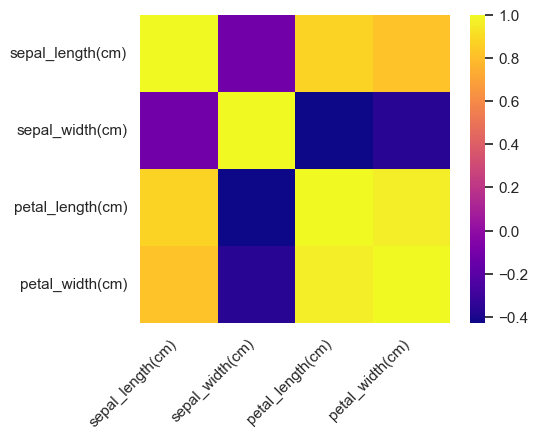

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
sepal_length(cm),1.000000,-0.117570,0.871754,0.817941
sepal_width(cm),-0.117570,1.000000,-0.428440,-0.366126
petal_length(cm),0.871754,-0.428440,1.000000,0.962865
petal_width(cm),0.817941,-0.366126,0.962865,1.000000


In [89]:
sns.heatmap(dataset.corr(), cmap='plasma')
plt.xticks(rotation=45, ha="right")
plt.show()
dataset.corr()

### Scatter plot of each combination of four columns.

Based on the observation of the scatter plot graphs, it can be inferred that there are at least two clusters present in each plot.

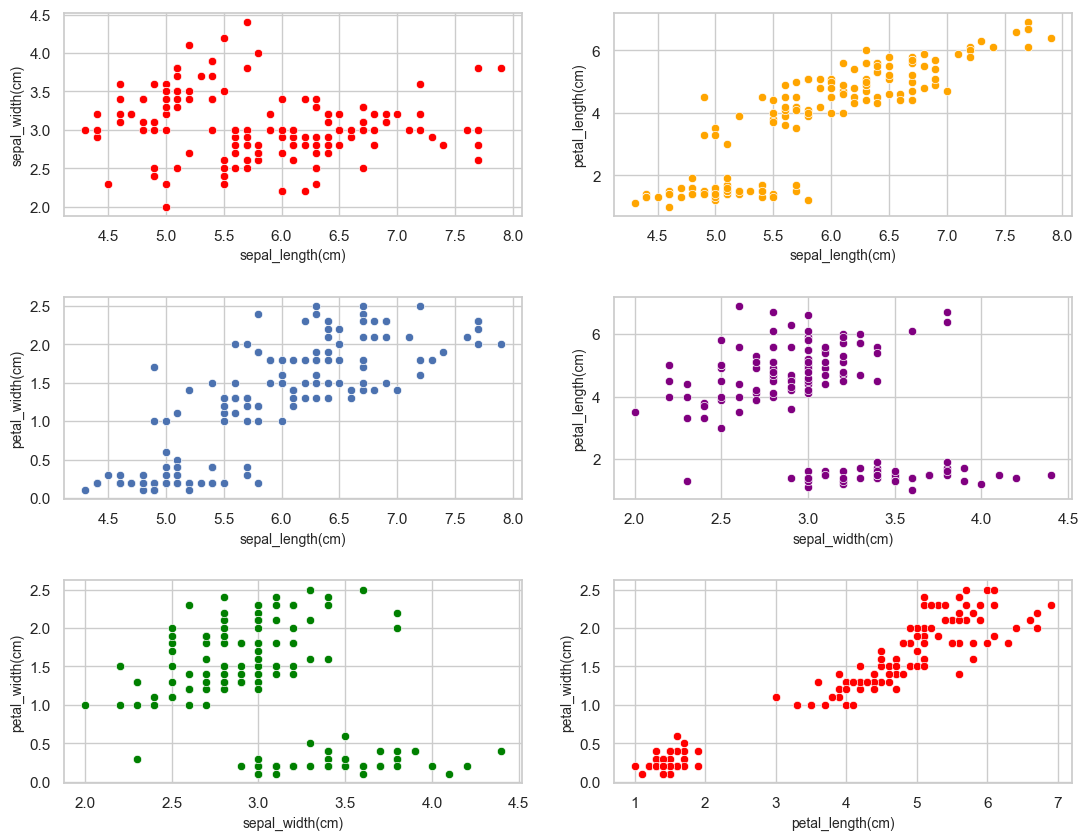

In [65]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid")

comb = list(combinations(dataset.columns,2))

fig, axis1 = plt.subplots(nrows=len(comb)//2, ncols=2, figsize=(13, 10))
color_arr = ['red','orange',None,'purple','green']

fig.subplots_adjust(wspace=0.2, hspace=0.4)
for i, (j, k) in enumerate(comb):
    axis = axis1[i//2, i%2]
    sns.scatterplot(x=j,y=k,data=dataset, ax=axis, color=color_arr[i%len(color_arr)])
    axis.set_xlabel(j, fontsize=10)
    axis.set_ylabel(k, fontsize=10)
plt.show()

### Scatter plot of each column in single 2d graph

According to correlation, petal_width and length is taken as x and y, and remaing are taken as hue and radius size for scatter plot.
Based on this plot, we can see 3 portion where it can be distinguish that there could be 3 clusters

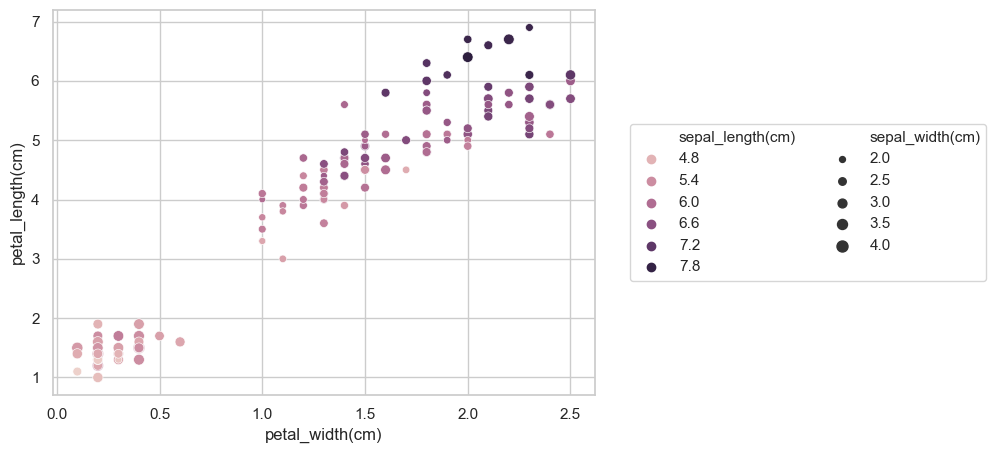

In [122]:
plt.figure(figsize=(7, 5))
scatterplot = sns.scatterplot(x='petal_width(cm)', 
                              y='petal_length(cm)', 
                              data=dataset, 
                              size='sepal_width(cm)', 
                              hue='sepal_length(cm)')
scatterplot.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2)
plt.show()

In [114]:
dataset.iloc[:, [0, 1, 2, 3]].values


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Preparing X and Y

In [5]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:,-1].values

## Predicting Dataset

Data is split into two sets: training and testing data. The model is trained on the training data and then used to predict the target value of the test data. The error between the true and predicted target value is then calculated to evaluate the performance of the model.

### Train/Test Split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 0)

In [7]:
model = LinearRegression()
model.fit(train_x,train_y)
m = model.coef_
c = model.intercept_
Y_axis = m*x + c

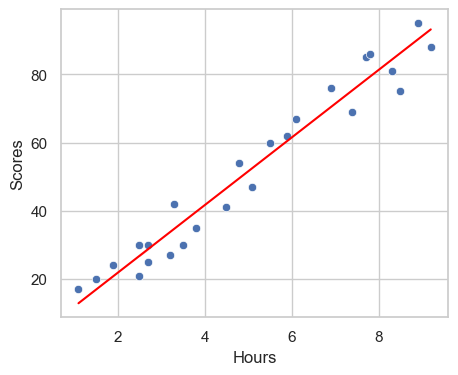

In [8]:
sns.scatterplot(x='Hours',y='Scores',data=dataset)
sns.lineplot(x=x.flatten(),y=Y_axis.flatten(), color='red')
plt.show()

### Prediction

In [9]:
y_pred = model.predict(test_x)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Evaluation
- mean_squared_error: A function from scikit-learn.metrics used to compute the mean squared error between the predicted and actual values.

- mean_absolute_error: A function from scikit-learn.metrics used to compute the mean absolute error between the predicted and actual values.

- r2_score: A function from scikit-learn.metrics used to compute the R-squared (coefficient of determination) regression score function.

In [10]:
print('mean_squared_error', mean_squared_error(test_y, y_pred), '\n',
      'mean_absolute_error', mean_absolute_error(test_y, y_pred), '\n',
      'r2_score', r2_score(test_y, y_pred))

mean_squared_error 21.598769307217413 
 mean_absolute_error 4.18385989900298 
 r2_score 0.9454906892105355


## Cross-Validation 

Cross-validation is a technique used to evaluate the performance of a machine learning model on unseen data. It is done by splitting the dataset into multiple folds, then training the model on each fold and evaluating it on the remaining folds. This process is repeated multiple times, with each fold used as a test set once. The final performance of the model is then averaged over all the folds.

In this case, the dataset is split at a random state different on each iteration. This means that each time the cross-validation process is run, a different set of training and test folds will be created. This helps to ensure that the performance of the model is not simply due to chance.

### Error Function
This function returns a data frame row containing the error metrics of model evaluation.

In [11]:
def error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mean_squared_error':mse, 'mean_absolute_error':mae, 'r2_score':r2}

In [12]:
errorDf = pd.DataFrame(columns=['random_state', 'mean_squared_error', 'mean_absolute_error', 'r2_score'])

model = LinearRegression()
for rdmState in range(1,200,5):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = rdmState)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    result = error(test_y, pred_y)
    result['random_state'] = rdmState
    errorDf = errorDf.append(result, ignore_index=True)

errorDf.head(5)

,random_state,mean_squared_error,mean_absolute_error,r2_score
0,1.0,68.880921,7.882398,0.842103
1,6.0,18.765475,4.230413,0.972394
2,11.0,78.660909,8.237073,0.881990
3,16.0,50.029620,6.682278,0.835299
4,21.0,30.680774,5.332780,0.884031


### Plotting Histogram

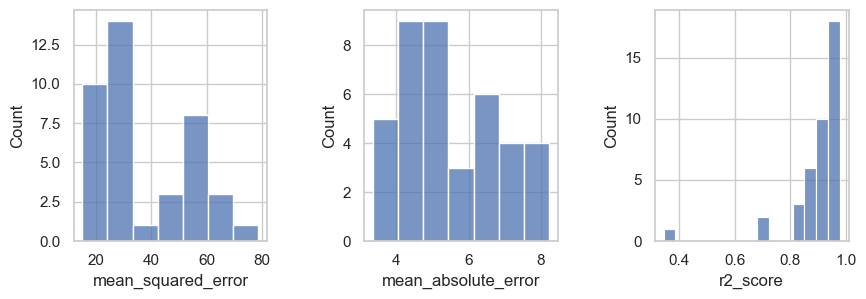

In [13]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# Plot histograms for each column on a separate subplot
sns.histplot(data=errorDf, x='mean_squared_error', ax=axes[0])
sns.histplot(data=errorDf, x='mean_absolute_error', ax=axes[1])
sns.histplot(data=errorDf, x='r2_score', ax=axes[2])
plt.show()

## Result
Overall, the model is performing well. The MSE and MAE are relatively small, and the R2 score is high. This means that the model is able to accurately predict the true values.

- The mean squared error is higher than the mean absolute error. This is because the squared error is more sensitive to outliers than the absolute error.
- The R2 score is close to 1. This means that the model is able to explain a large amount of the variance in the true values.

In [14]:
errorDf.drop('random_state', axis=1).agg(['mean','median']).transpose()

,mean,median
mean_squared_error,37.598356,30.740782
mean_absolute_error,5.546015,5.288847
r2_score,0.901040,0.926632
